In [3]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re

df1 = pd.read_csv('./output/project/넷플릭스_어제_.csv')
df2 = pd.read_csv('./output/project/넷플릭스_종합(어제 제외)_.csv',error_bad_lines=False)

display(df1)
display(df2)

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

C:\Users\na\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,전체 순위,키즈 순위,영화 순위,티비쇼 순위,전체 순위_장르,전체 순위_세부장르,키즈 순위_장르,키즈 순위_세부장르,영화 순위_장르,영화 순위_세부장르,티비쇼 순위_장르,티비쇼 순위_세부장르
0,0,Hometown Cha-Cha-Cha,Octonauts: Above & Beyond,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Hometown Cha-Cha-Cha,Comedy,Rom Com,Animation,For babies,Animated,Anime,Comedy,Rom Com
1,1,My Name,A Tale Dark & Grimm,Diva,My Name,Mystery,Revenge,Animation,For babies,Thriller,NaN,Mystery,Revenge
2,2,Squid Game,SpongeBob SquarePants,The Guilty,Squid Game,Mystery,Trap,Animation,For Boys,Crime,Disapperance,Mystery,Trap
3,3,Reflection of You,Bread Barbershop,Asura: The City of Madness,Reflection of You,Drama,NaN,Animation,For babies,Crime,NaN,Drama,NaN
4,4,The King's Affection,A Haunted House,Downsizing,The King's Affection,Romance,NaN,Comedy,Parody,Comedy,Shrinking,Romance,NaN
5,5,The Way of the Househusband,Let's Go! GALAXY GUARDS,Violet Evergarden: The Movie,The Way of the Househusband,Animation,Anime,Animation,NaN,Animated,Anime,Animation,Anime
6,6,The Fisherman and the City,Pokémon Journeys,Security,The Fisherman and the City,Realityshow,NaN,Animation,For Boys,Action,Terorrism,Realityshow,NaN
7,7,Paik's Spirit,Spirited Away,Blackhat,Paik's Spirit,Talk Show,Food,Animated,For Older Kids,Thriller,Spies,Talk Show,Food
8,8,Hospital Playlist,Corpse Bride,Kingdom: Ashin of the North,Hospital Playlist,Drama,Relationship,Animated,For Older Kids,Horror,Zombies,Drama,Relationship
9,9,D.P.,Doraemon,Night in Paradise,D.P.,Drama,War,Animation,Anime,Crime,Gangsters,Drama,War


,Unnamed: 0,이번주 영화 top10,이번주 티비쇼 top10,이번주 영화 탑10_장르,이번주 영화 탑10_세부장르,이번주 티비쇼 top10_장르,이번주 티비쇼 top10_세부장르,이번달 영화 top10,이번 달 티비쇼 top10,이번달 영화 top10.1,...,저번 주 영화 탑10_장르,저번 주 영화 탑10_세부장르,저번 주 티비쇼 top10_장르,저번 주 티비쇼 top10_세부장르,저번 달 영화 top10,저번 달 티비쇼 top10,저번 달 영화 탑10_장르,저번 달 영화 탑10_세부장르,저번 달 티비쇼 top10_장르,저번 달 티비쇼 top10_세부장르
0,0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Hometown Cha-Cha-Cha,Animated,Anime,Comedy,Rom Com,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Hometown Cha-Cha-Cha,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,...,Animated,Anime,Comedy,Rom Com,Kate,Hometown Cha-Cha-Cha,Action,Revenge,Comedy,Rom Com
1,1,The Guilty,Squid Game,Crime,Disapperance,Mystery,Trap,The Guilty,Squid Game,The Guilty,...,Crime,Disapperance,Mystery,Trap,Inside Men,D.P.,Action,Crime,Drama,War
2,2,Security,The Way of the Househusband,Action,Terorrism,Animation,Anime,Asura: The City of Madness,Paik's Spirit,Asura: The City of Madness,...,Crime,NaN,Talk Show,Food,Moby Dick,Hospital Playlist,Action,NaN,Drama,Relationship
3,3,Blackhat,Paik's Spirit,Thriller,Spies,Talk Show,Food,Blackhat,D.P.,Blackhat,...,Drama,Planes,Drama,War,SAS: Red Notice,Hotel Del Luna,Action,Terorrism,Science Fiction,Ghosts
4,4,Asura: The City of Madness,The King's Affection,Crime,NaN,Romance,NaN,Security,Hospital Playlist,Security,...,Thriller,Spies,Drama,Relationship,Kingdom: Ashin of the North,Squid Game,Horror,Zombies,Mystery,Trap
5,5,Downsizing,Hospital Playlist,Comedy,Shrinking,Drama,Relationship,Flight,The Way of the Househusband,Flight,...,Horror,Trap,Animation,Anime,Intrusion,Change Days,Thriller,Thrillers,Realityshow,NaN
6,6,Violet Evergarden: The Movie,D.P.,Animated,Anime,Drama,War,No One Gets Out Alive,Hotel Del Luna,No One Gets Out Alive,...,Horror,Zombies,Science Fiction,Ghosts,Double Jeopardy,Love After Divorce,Thriller,Conspiracy,Realityshow,NaN
7,7,Mr. & Mrs. Smith,Reflection of You,Action,Spies,Drama,NaN,Kingdom: Ashin of the North,Baki Hanma,Kingdom: Ashin of the North,...,Thriller,NaN,Realityshow,NaN,The Guard Post,Men on a Mission,Horror,NaN,Quiz Show,NaN
8,8,The Snowman,Hotel Del Luna,Animated,NaN,Science Fiction,Ghosts,The Snowman,The King's Affection,The Snowman,...,Action,Terorrism,Realityshow,Sport,Whispering Corridors 6: The Humming,Sex Education,Horror,NaN,Comedy,Teens
9,9,Kingdom: Ashin of the North,Doomed Marriage,Horror,Zombies,Realityshow,NaN,After,Doomed Marriage,After,...,Animated,NaN,Animation,Anime,Prey,Money Heist,Adventure,Serial killer,Action,Heist


In [4]:
df3=pd.concat([df1,df2],axis=1)
display(df3)

,Unnamed: 0,전체 순위,키즈 순위,영화 순위,티비쇼 순위,전체 순위_장르,전체 순위_세부장르,키즈 순위_장르,키즈 순위_세부장르,영화 순위_장르,...,저번 주 영화 탑10_장르,저번 주 영화 탑10_세부장르,저번 주 티비쇼 top10_장르,저번 주 티비쇼 top10_세부장르,저번 달 영화 top10,저번 달 티비쇼 top10,저번 달 영화 탑10_장르,저번 달 영화 탑10_세부장르,저번 달 티비쇼 top10_장르,저번 달 티비쇼 top10_세부장르
0,0,Hometown Cha-Cha-Cha,Octonauts: Above & Beyond,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Hometown Cha-Cha-Cha,Comedy,Rom Com,Animation,For babies,Animated,...,Animated,Anime,Comedy,Rom Com,Kate,Hometown Cha-Cha-Cha,Action,Revenge,Comedy,Rom Com
1,1,My Name,A Tale Dark & Grimm,Diva,My Name,Mystery,Revenge,Animation,For babies,Thriller,...,Crime,Disapperance,Mystery,Trap,Inside Men,D.P.,Action,Crime,Drama,War
2,2,Squid Game,SpongeBob SquarePants,The Guilty,Squid Game,Mystery,Trap,Animation,For Boys,Crime,...,Crime,NaN,Talk Show,Food,Moby Dick,Hospital Playlist,Action,NaN,Drama,Relationship
3,3,Reflection of You,Bread Barbershop,Asura: The City of Madness,Reflection of You,Drama,NaN,Animation,For babies,Crime,...,Drama,Planes,Drama,War,SAS: Red Notice,Hotel Del Luna,Action,Terorrism,Science Fiction,Ghosts
4,4,The King's Affection,A Haunted House,Downsizing,The King's Affection,Romance,NaN,Comedy,Parody,Comedy,...,Thriller,Spies,Drama,Relationship,Kingdom: Ashin of the North,Squid Game,Horror,Zombies,Mystery,Trap
5,5,The Way of the Househusband,Let's Go! GALAXY GUARDS,Violet Evergarden: The Movie,The Way of the Househusband,Animation,Anime,Animation,NaN,Animated,...,Horror,Trap,Animation,Anime,Intrusion,Change Days,Thriller,Thrillers,Realityshow,NaN
6,6,The Fisherman and the City,Pokémon Journeys,Security,The Fisherman and the City,Realityshow,NaN,Animation,For Boys,Action,...,Horror,Zombies,Science Fiction,Ghosts,Double Jeopardy,Love After Divorce,Thriller,Conspiracy,Realityshow,NaN
7,7,Paik's Spirit,Spirited Away,Blackhat,Paik's Spirit,Talk Show,Food,Animated,For Older Kids,Thriller,...,Thriller,NaN,Realityshow,NaN,The Guard Post,Men on a Mission,Horror,NaN,Quiz Show,NaN
8,8,Hospital Playlist,Corpse Bride,Kingdom: Ashin of the North,Hospital Playlist,Drama,Relationship,Animated,For Older Kids,Horror,...,Action,Terorrism,Realityshow,Sport,Whispering Corridors 6: The Humming,Sex Education,Horror,NaN,Comedy,Teens
9,9,D.P.,Doraemon,Night in Paradise,D.P.,Drama,War,Animation,Anime,Crime,...,Animated,NaN,Animation,Anime,Prey,Money Heist,Adventure,Serial killer,Action,Heist


In [5]:
############################################################################################################

In [6]:
df_movie=df3.loc[:,["영화 순위","이번주 영화 top10","저번 주 영화 top10","이번달 영화 top10","저번 달 영화 top10"]]
df_movie

,영화 순위,이번주 영화 top10,저번 주 영화 top10,이번달 영화 top10,저번 달 영화 top10
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Kate
1,Diva,The Guilty,The Guilty,The Guilty,Inside Men
2,The Guilty,Security,Asura: The City of Madness,Asura: The City of Madness,Moby Dick
3,Asura: The City of Madness,Blackhat,Flight,Blackhat,SAS: Red Notice
4,Downsizing,Asura: The City of Madness,Blackhat,Security,Kingdom: Ashin of the North
5,Violet Evergarden: The Movie,Downsizing,No One Gets Out Alive,Flight,Intrusion
6,Security,Violet Evergarden: The Movie,Kingdom: Ashin of the North,No One Gets Out Alive,Double Jeopardy
7,Blackhat,Mr. & Mrs. Smith,After,Kingdom: Ashin of the North,The Guard Post
8,Kingdom: Ashin of the North,The Snowman,Security,The Snowman,Whispering Corridors 6: The Humming
9,Night in Paradise,Kingdom: Ashin of the North,The Snowman,After,Prey


In [7]:
df_movieGR=df3.loc[:,["영화 순위_장르","이번주 영화 탑10_장르",
                      "저번 주 영화 탑10_장르",
                      "이번 달 영화 탑10_장르",
                      "저번 달 영화 탑10_장르",]]
df_movieGR

,영화 순위_장르,이번주 영화 탑10_장르,저번 주 영화 탑10_장르,이번 달 영화 탑10_장르,저번 달 영화 탑10_장르
0,Animated,Animated,Animated,Animated,Action
1,Thriller,Crime,Crime,Crime,Action
2,Crime,Action,Crime,Crime,Action
3,Crime,Thriller,Drama,Thriller,Action
4,Comedy,Crime,Thriller,Action,Horror
5,Animated,Comedy,Horror,Drama,Thriller
6,Action,Animated,Horror,Horror,Thriller
7,Thriller,Action,Thriller,Horror,Horror
8,Horror,Animated,Action,Animated,Horror
9,Crime,Horror,Animated,Thriller,Adventure


In [8]:
df_movieDGR=df3.loc[:,["영화 순위_세부장르","이번주 영화 탑10_세부장르",
                      "저번 주 영화 탑10_세부장르",
                      "이번 달 영화 탑10_세부장르",
                      "저번 달 영화 탑10_세부장르"]]
df_movieDGR

,영화 순위_세부장르,이번주 영화 탑10_세부장르,저번 주 영화 탑10_세부장르,이번 달 영화 탑10_세부장르,저번 달 영화 탑10_세부장르
0,Anime,Anime,Anime,Anime,Revenge
1,NaN,Disapperance,Disapperance,Disapperance,Crime
2,Disapperance,Terorrism,NaN,NaN,NaN
3,NaN,Spies,Planes,Spies,Terorrism
4,Shrinking,NaN,Spies,Terorrism,Zombies
5,Anime,Shrinking,Trap,Planes,Thrillers
6,Terorrism,Anime,Zombies,Trap,Conspiracy
7,Spies,Spies,NaN,Zombies,NaN
8,Zombies,NaN,Terorrism,NaN,NaN
9,Gangsters,Zombies,NaN,NaN,Serial killer


In [9]:
df_tvshow=df3.loc[:,["티비쇼 순위","이번주 티비쇼 top10","저번 주 티비쇼 top10","이번 달 티비쇼 top10","저번 달 티비쇼 top10"]]
df_tvshow

,티비쇼 순위,이번주 티비쇼 top10,저번 주 티비쇼 top10,이번 달 티비쇼 top10,저번 달 티비쇼 top10
0,Hometown Cha-Cha-Cha,Hometown Cha-Cha-Cha,Hometown Cha-Cha-Cha,Hometown Cha-Cha-Cha,Hometown Cha-Cha-Cha
1,My Name,Squid Game,Squid Game,Squid Game,D.P.
2,Squid Game,The Way of the Househusband,Paik's Spirit,Paik's Spirit,Hospital Playlist
3,Reflection of You,Paik's Spirit,D.P.,D.P.,Hotel Del Luna
4,The King's Affection,The King's Affection,Hospital Playlist,Hospital Playlist,Squid Game
5,The Way of the Househusband,Hospital Playlist,Baki Hanma,The Way of the Househusband,Change Days
6,The Fisherman and the City,D.P.,Hotel Del Luna,Hotel Del Luna,Love After Divorce
7,Paik's Spirit,Reflection of You,Doomed Marriage,Baki Hanma,Men on a Mission
8,Hospital Playlist,Hotel Del Luna,The Gentlemen's League,The King's Affection,Sex Education
9,D.P.,Doomed Marriage,The Way of the Househusband,Doomed Marriage,Money Heist


In [10]:
df_tvshowGR=df3.loc[:,["티비쇼 순위_장르","이번주 티비쇼 top10_장르",
                      "저번 주 티비쇼 top10_장르",
                      "이번 달 티비쇼 top10_장르",
                      "저번 달 티비쇼 top10_장르",]]
df_tvshowGR

,티비쇼 순위_장르,이번주 티비쇼 top10_장르,저번 주 티비쇼 top10_장르,이번 달 티비쇼 top10_장르,저번 달 티비쇼 top10_장르
0,Comedy,Comedy,Comedy,Comedy,Comedy
1,Mystery,Mystery,Mystery,Mystery,Drama
2,Mystery,Animation,Talk Show,Talk Show,Drama
3,Drama,Talk Show,Drama,Drama,Science Fiction
4,Romance,Romance,Drama,Drama,Mystery
5,Animation,Drama,Animation,Animation,Realityshow
6,Realityshow,Drama,Science Fiction,Science Fiction,Realityshow
7,Talk Show,Drama,Realityshow,Animation,Quiz Show
8,Drama,Science Fiction,Realityshow,Romance,Comedy
9,Drama,Realityshow,Animation,Realityshow,Action


In [11]:
df_tvshowDGR=df3.loc[:,["티비쇼 순위_세부장르","이번주 티비쇼 top10_세부장르",
                      "저번 주 티비쇼 top10_세부장르",
                      "이번 달 티비쇼 top10_세부장르",
                      "저번 달 티비쇼 top10_세부장르",]]
df_tvshowDGR

,티비쇼 순위_세부장르,이번주 티비쇼 top10_세부장르,저번 주 티비쇼 top10_세부장르,이번 달 티비쇼 top10_세부장르,저번 달 티비쇼 top10_세부장르
0,Rom Com,Rom Com,Rom Com,Rom Com,Rom Com
1,Revenge,Trap,Trap,Trap,War
2,Trap,Anime,Food,Food,Relationship
3,NaN,Food,War,War,Ghosts
4,NaN,NaN,Relationship,Relationship,Trap
5,Anime,Relationship,Anime,Anime,NaN
6,NaN,War,Ghosts,Ghosts,NaN
7,Food,NaN,NaN,Anime,NaN
8,Relationship,Ghosts,Sport,NaN,Teens
9,War,NaN,Anime,NaN,Heist


In [12]:
#############################################################################################

In [13]:
#영화
values=df_movie.values
values = "".join(str(i) for i in df_movie.values)
values

values = re.sub(" ","",values)
values = re.sub("[[]","",values)
values = re.sub("[]]","",values)


no_capitals = values.lower().split()
no_capitals

C:\Users\na\AppData\Local\Temp/ipykernel_4220/2335703062.py:7: FutureWarning: Possible nested set at position 1
  values = re.sub("[[]","",values)


["'demonslayer-kimetsunoyaiba-themovie:mugentrain'",
 "'demonslayer-kimetsunoyaiba-themovie:mugentrain'",
 "'demonslayer-kimetsunoyaiba-themovie:mugentrain'",
 "'demonslayer-kimetsunoyaiba-themovie:mugentrain''kate''diva''theguilty''theguilty''theguilty''insidemen''theguilty''security''asura:thecityofmadness'",
 "'asura:thecityofmadness''mobydick''asura:thecityofmadness''blackhat''flight''blackhat'",
 "'sas:rednotice''downsizing''asura:thecityofmadness''blackhat''security'",
 "'kingdom:ashinofthenorth''violetevergarden:themovie''downsizing''noonegetsoutalive'",
 "'flight''intrusion''security''violetevergarden:themovie''kingdom:ashinofthenorth'",
 "'noonegetsoutalive''doublejeopardy''blackhat''mr.&mrs.smith''after''kingdom:ashinofthenorth'",
 "'theguardpost''kingdom:ashinofthenorth''thesnowman''security''thesnowman'",
 "'whisperingcorridors6:thehumming''nightinparadise''kingdom:ashinofthenorth''thesnowman''after'",
 "'prey'"]

In [14]:
#영화장르
values=df_movieGR.values
values = "".join(str(i) for i in df_movieGR.values)
values

values = re.sub(" ","",values)
values = re.sub("[[]","",values)
values = re.sub("[]]","",values)

no_capitals = values.lower().split()
no_capitals

["'animated''animated''animated''animated''action''thriller''crime''crime''crime''action''crime''action''crime''crime''action''crime''thriller''drama''thriller''action''comedy''crime''thriller''action''horror''animated''comedy''horror''drama''thriller''action''animated''horror''horror''thriller''thriller''action''thriller''horror''horror''horror''animated''action''animated''horror''crime''horror''animated''thriller''adventure'"]

In [15]:
#tvshow
values=df_tvshow.values
values = "".join(str(i) for i in df_tvshow.values)
values

values = re.sub(" ","",values)
values = re.sub("[[]","",values)
values = re.sub("[]]","",values)

no_capitals = values.lower().split()
no_capitals

["'hometowncha-cha-cha''hometowncha-cha-cha''hometowncha-cha-cha'",
 '\'hometowncha-cha-cha\'\'hometowncha-cha-cha\'\'myname\'\'squidgame\'\'squidgame\'\'squidgame\'\'d.p.\'\'squidgame\'\'thewayofthehousehusband\'"paik\'sspirit"',
 '"paik\'sspirit"\'hospitalplaylist\'\'reflectionofyou\'"paik\'sspirit"\'d.p.\'\'d.p.\'\'hoteldelluna\'"theking\'saffection""theking\'saffection"\'hospitalplaylist\'',
 "'hospitalplaylist''squidgame''thewayofthehousehusband''hospitalplaylist''bakihanma'",
 "'thewayofthehousehusband''changedays''thefishermanandthecity''d.p.''hoteldelluna''hoteldelluna'",
 '\'loveafterdivorce\'"paik\'sspirit"\'reflectionofyou\'\'doomedmarriage\'\'bakihanma\'',
 '\'menonamission\'\'hospitalplaylist\'\'hoteldelluna\'"thegentlemen\'sleague"',
 '"theking\'saffection"\'sexeducation\'\'d.p.\'\'doomedmarriage\'\'thewayofthehousehusband\'\'doomedmarriage\'',
 "'moneyheist'"]

In [16]:
#tvshow장르
values=df_tvshowGR.values
values = "".join(str(i) for i in df_tvshowGR.values)
values

values = re.sub(" ","",values)
values = re.sub("[[]","",values)
values = re.sub("[]]","",values)

no_capitals = values.lower().split()
no_capitals

["'comedy''comedy''comedy''comedy''comedy''mystery''mystery''mystery''mystery''drama''mystery''animation''talkshow''talkshow''drama''drama''talkshow''drama''drama''sciencefiction''romance''romance''drama''drama''mystery''animation''drama''animation''animation''realityshow''realityshow''drama''sciencefiction''sciencefiction''realityshow''talkshow''drama''realityshow''animation''quizshow''drama''sciencefiction''realityshow''romance''comedy''drama''realityshow''animation''realityshow''action'"]

In [17]:
##############################################################################################################

In [18]:
##영화
movie=df_movie.apply(pd.value_counts)
movie=pd.DataFrame(movie.sum(axis=1))
movie=movie.rename(columns={0:'cnt'})

movie

,cnt
After,2.0
Asura: The City of Madness,4.0
Blackhat,4.0
Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train,4.0
Diva,1.0
Double Jeopardy,1.0
Downsizing,2.0
Flight,2.0
Inside Men,1.0
Intrusion,1.0


In [19]:
##tvshow

tvshow=df_tvshow.apply(pd.value_counts)
tvshow=pd.DataFrame(tvshow.sum(axis=1))
tvshow=tvshow.rename(columns={0:'cnt'})

tvshow

,cnt
Baki Hanma,2.0
Change Days,1.0
D.P.,5.0
Doomed Marriage,3.0
Hometown Cha-Cha-Cha,5.0
Hospital Playlist,5.0
Hotel Del Luna,4.0
Love After Divorce,1.0
Men on a Mission,1.0
Money Heist,1.0


In [20]:
dfGR1=df_movieGR.apply(pd.value_counts)
dfGR1

,영화 순위_장르,이번주 영화 탑10_장르,저번 주 영화 탑10_장르,이번 달 영화 탑10_장르,저번 달 영화 탑10_장르
Action,1.0,2.0,1.0,1.0,4.0
Adventure,NaN,NaN,NaN,NaN,1.0
Animated,2.0,3.0,2.0,2.0,NaN
Comedy,1.0,1.0,NaN,NaN,NaN
Crime,3.0,2.0,2.0,2.0,NaN
Drama,NaN,NaN,1.0,1.0,NaN
Horror,1.0,1.0,2.0,2.0,3.0
Thriller,2.0,1.0,2.0,2.0,2.0


In [21]:
dfDGR1=df_movieDGR.apply(pd.value_counts)
dfDGR1

,영화 순위_세부장르,이번주 영화 탑10_세부장르,저번 주 영화 탑10_세부장르,이번 달 영화 탑10_세부장르,저번 달 영화 탑10_세부장르
Anime,2.0,2.0,1.0,1.0,NaN
Conspiracy,NaN,NaN,NaN,NaN,1.0
Crime,NaN,NaN,NaN,NaN,1.0
Disapperance,1.0,1.0,1.0,1.0,NaN
Gangsters,1.0,NaN,NaN,NaN,NaN
Planes,NaN,NaN,1.0,1.0,NaN
Revenge,NaN,NaN,NaN,NaN,1.0
Serial killer,NaN,NaN,NaN,NaN,1.0
Shrinking,1.0,1.0,NaN,NaN,NaN
Spies,1.0,2.0,1.0,1.0,NaN


In [22]:
df_tvshow.apply(pd.value_counts)

,티비쇼 순위,이번주 티비쇼 top10,저번 주 티비쇼 top10,이번 달 티비쇼 top10,저번 달 티비쇼 top10
Baki Hanma,NaN,NaN,1.0,1.0,NaN
Change Days,NaN,NaN,NaN,NaN,1.0
D.P.,1.0,1.0,1.0,1.0,1.0
Doomed Marriage,NaN,1.0,1.0,1.0,NaN
Hometown Cha-Cha-Cha,1.0,1.0,1.0,1.0,1.0
Hospital Playlist,1.0,1.0,1.0,1.0,1.0
Hotel Del Luna,NaN,1.0,1.0,1.0,1.0
Love After Divorce,NaN,NaN,NaN,NaN,1.0
Men on a Mission,NaN,NaN,NaN,NaN,1.0
Money Heist,NaN,NaN,NaN,NaN,1.0


In [23]:
dfGR2=df_tvshowGR.apply(pd.value_counts)
dfGR2

,티비쇼 순위_장르,이번주 티비쇼 top10_장르,저번 주 티비쇼 top10_장르,이번 달 티비쇼 top10_장르,저번 달 티비쇼 top10_장르
Action,NaN,NaN,NaN,NaN,1.0
Animation,1.0,1.0,2.0,2.0,NaN
Comedy,1.0,1.0,1.0,1.0,2.0
Drama,3.0,3.0,2.0,2.0,2.0
Mystery,2.0,1.0,1.0,1.0,1.0
Quiz Show,NaN,NaN,NaN,NaN,1.0
Realityshow,1.0,1.0,2.0,1.0,2.0
Romance,1.0,1.0,NaN,1.0,NaN
Science Fiction,NaN,1.0,1.0,1.0,1.0
Talk Show,1.0,1.0,1.0,1.0,NaN


In [24]:
dfDGR2=df_tvshowDGR.apply(pd.value_counts)
dfDGR2

,티비쇼 순위_세부장르,이번주 티비쇼 top10_세부장르,저번 주 티비쇼 top10_세부장르,이번 달 티비쇼 top10_세부장르,저번 달 티비쇼 top10_세부장르
Anime,1.0,1.0,2.0,2.0,NaN
Food,1.0,1.0,1.0,1.0,NaN
Ghosts,NaN,1.0,1.0,1.0,1.0
Heist,NaN,NaN,NaN,NaN,1.0
Relationship,1.0,1.0,1.0,1.0,1.0
Revenge,1.0,NaN,NaN,NaN,NaN
Rom Com,1.0,1.0,1.0,1.0,1.0
Sport,NaN,NaN,1.0,NaN,NaN
Teens,NaN,NaN,NaN,NaN,1.0
Trap,1.0,1.0,1.0,1.0,1.0


In [25]:
#####################################################################################################################


In [26]:
df_movie

,영화 순위,이번주 영화 top10,저번 주 영화 top10,이번달 영화 top10,저번 달 영화 top10
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,Kate
1,Diva,The Guilty,The Guilty,The Guilty,Inside Men
2,The Guilty,Security,Asura: The City of Madness,Asura: The City of Madness,Moby Dick
3,Asura: The City of Madness,Blackhat,Flight,Blackhat,SAS: Red Notice
4,Downsizing,Asura: The City of Madness,Blackhat,Security,Kingdom: Ashin of the North
5,Violet Evergarden: The Movie,Downsizing,No One Gets Out Alive,Flight,Intrusion
6,Security,Violet Evergarden: The Movie,Kingdom: Ashin of the North,No One Gets Out Alive,Double Jeopardy
7,Blackhat,Mr. & Mrs. Smith,After,Kingdom: Ashin of the North,The Guard Post
8,Kingdom: Ashin of the North,The Snowman,Security,The Snowman,Whispering Corridors 6: The Humming
9,Night in Paradise,Kingdom: Ashin of the North,The Snowman,After,Prey


In [27]:
df_movieGR=pd.DataFrame(dfGR1.sum(axis=1)) #영화장르
df_movieGR=df_movieGR.rename(columns={0:'cnt'})

In [28]:
df_movieDGR=pd.DataFrame(dfDGR1.sum(axis=1)) #영화세부장르
df_movieDGR=df_movieDGR.rename(columns={0:'cnt'})

In [29]:
df_tvshowGR=pd.DataFrame(dfGR2.sum(axis=1)) #tvshow장르
df_tvshowGR=df_tvshowGR.rename(columns={0:'cnt'})

In [30]:
df_tvshowDGR=pd.DataFrame(dfDGR2.sum(axis=1)) #tvshow 세부장르
df_tvshowDGR=df_tvshowDGR.rename(columns={0:'cnt'})

In [31]:
df_movieGR

,cnt
Action,9.0
Adventure,1.0
Animated,9.0
Comedy,2.0
Crime,9.0
Drama,2.0
Horror,9.0
Thriller,9.0


In [32]:
df_movieDGR

,cnt
Anime,6.0
Conspiracy,1.0
Crime,1.0
Disapperance,4.0
Gangsters,1.0
Planes,2.0
Revenge,1.0
Serial killer,1.0
Shrinking,2.0
Spies,5.0


In [33]:
df_tvshowGR

,cnt
Action,1.0
Animation,6.0
Comedy,6.0
Drama,12.0
Mystery,6.0
Quiz Show,1.0
Realityshow,7.0
Romance,3.0
Science Fiction,4.0
Talk Show,4.0


In [34]:
df_tvshowDGR

,cnt
Anime,6.0
Food,4.0
Ghosts,4.0
Heist,1.0
Relationship,5.0
Revenge,1.0
Rom Com,5.0
Sport,1.0
Teens,1.0
Trap,5.0


In [35]:
###################데이터 시각화 ######################################

In [36]:
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

Figure(936x432)
AxesSubplot(0.125,0.125;0.775x0.755)


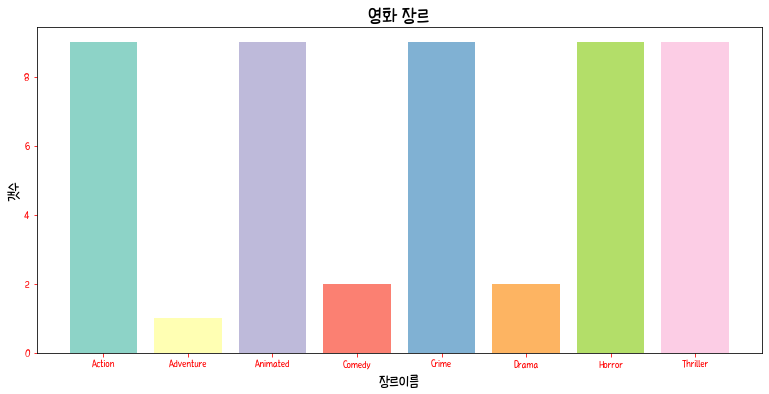

In [37]:
plt.figure(figsize=(13,6))
print(plt.gcf())
s = df_movieGR

plt.title("영화 장르",size=20)
plt.ylabel('갯수',size=15)
plt.xlabel('장르이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(x=s.index, height=s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/영화 장르.png')

Figure(936x432)
AxesSubplot(0.125,0.125;0.775x0.755)


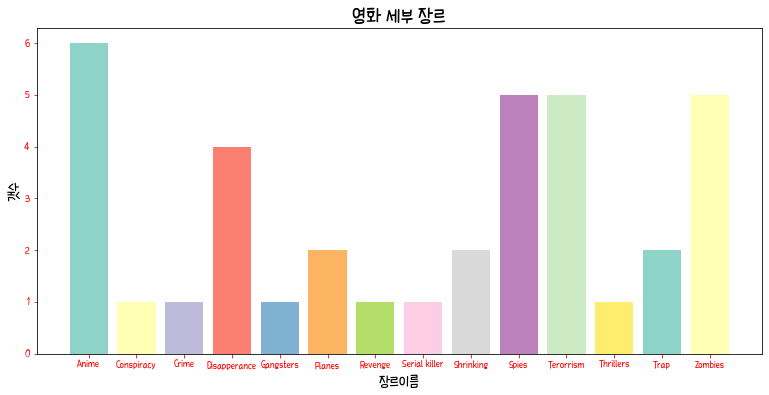

In [38]:
plt.figure(figsize=(13,6))
print(plt.gcf())
s = df_movieDGR

plt.title("영화 세부 장르",size=20)
plt.ylabel('갯수',size=15)
plt.xlabel('장르이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')


mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(x=s.index, height=s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/영화 세부 장르.png')

Figure(936x432)
AxesSubplot(0.125,0.125;0.775x0.755)


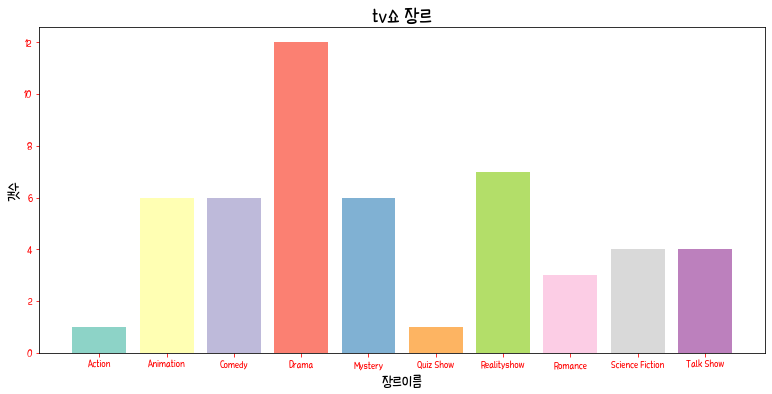

In [39]:
plt.figure(figsize=(13,6))
print(plt.gcf())
s = df_tvshowGR

plt.title("tv쇼 장르",size=20)
plt.ylabel('갯수',size=15)
plt.xlabel('장르이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(x=s.index, height=s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/tv쇼 장르.png')

Figure(936x432)
AxesSubplot(0.125,0.125;0.775x0.755)


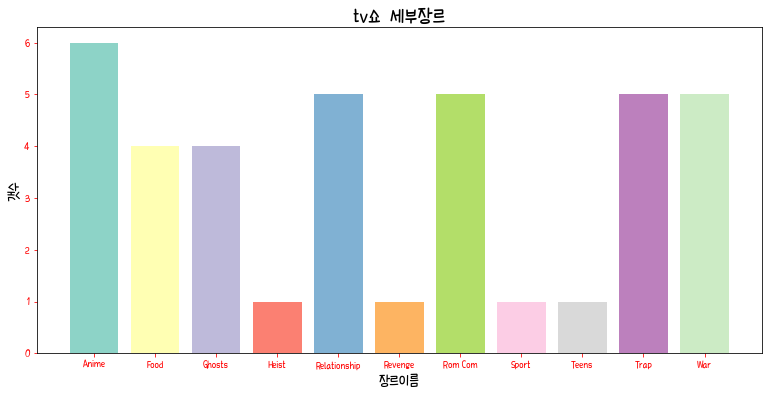

In [40]:
plt.figure(figsize=(13,6))
print(plt.gcf())
s = df_tvshowDGR

plt.title("tv쇼  세부장르",size=20)
plt.ylabel('갯수',size=15)
plt.xlabel('장르이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.bar(x=s.index, height=s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/tv쇼 세부장르.png')

In [41]:
#################영화 및 티비쇼 이름##########################################

Figure(1296x720)
AxesSubplot(0.125,0.125;0.775x0.755)


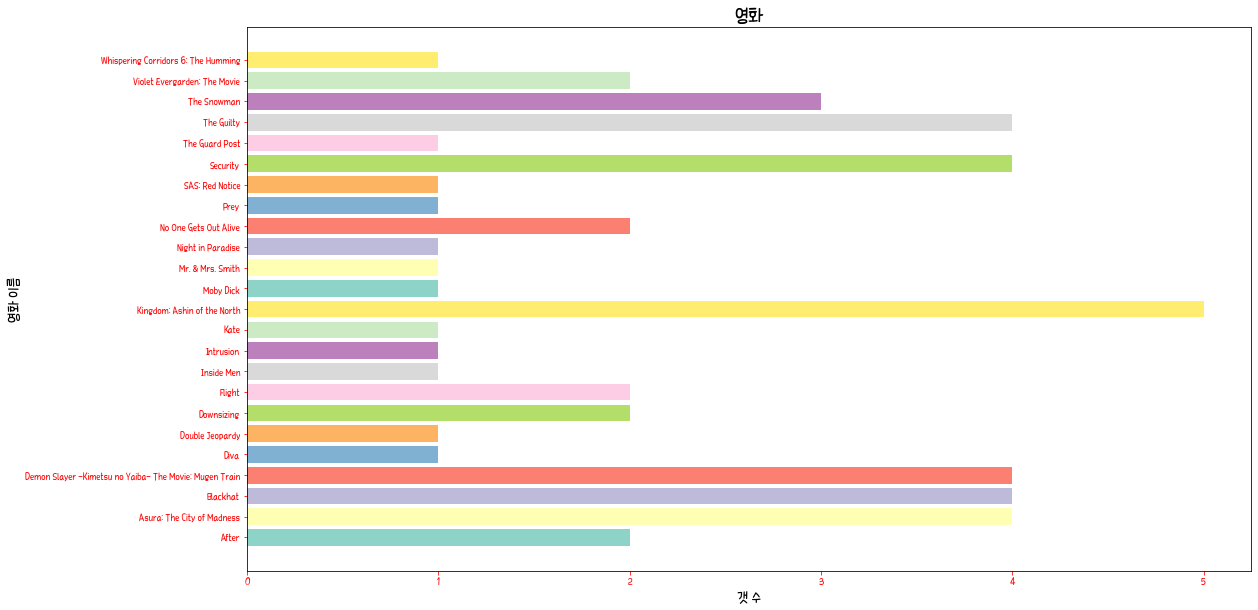

In [42]:
plt.figure(figsize=(18,10))
print(plt.gcf())
s = movie

plt.title("영화",size=20)
plt.xlabel('갯 수',size=15)
plt.ylabel('영화 이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/영화.png')

Figure(1080x720)
AxesSubplot(0.125,0.125;0.775x0.755)


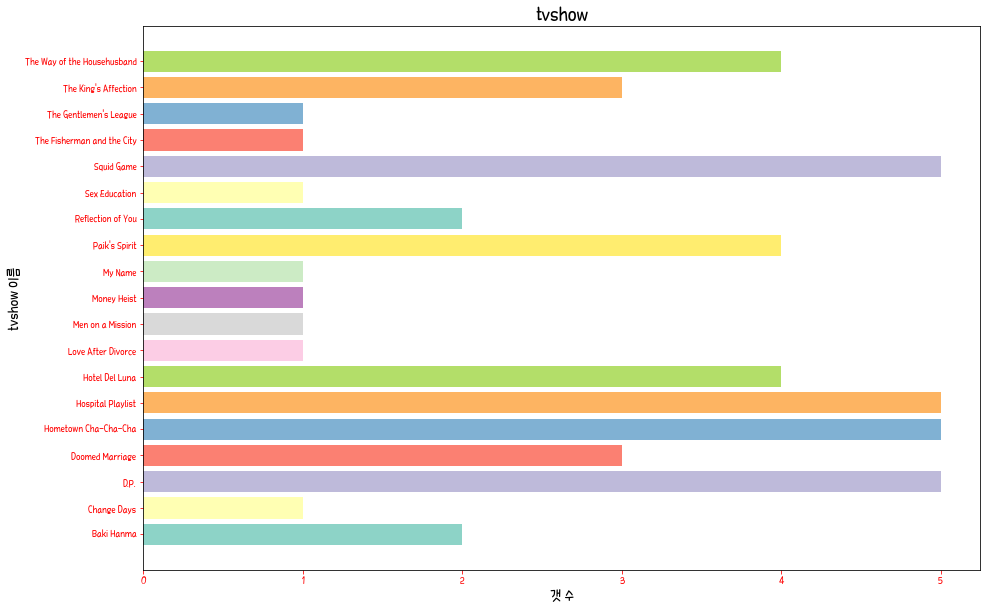

In [43]:
plt.figure(figsize=(15,10))
print(plt.gcf())
s = tvshow

plt.title("tvshow",size=20)
plt.xlabel('갯 수',size=15)
plt.ylabel('tvshow 이름',size=15)

ax = plt.gca() #Axes(Axis)
print(ax)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

mycolors = sns.color_palette('Set3',len(s.index))
plt.barh(s.index,s.cnt, color=mycolors)
#plt.show()
plt.savefig('./output/project/tv쇼.png')

In [152]:
#####################분석#####################################################################################################

In [44]:
v1=df3.loc[:,["영화 순위_장르","이번주 영화 탑10_장르",
              "저번 주 영화 탑10_장르",
              "이번 달 영화 탑10_장르",
              "저번 달 영화 탑10_장르",]]
v1

,영화 순위_장르,이번주 영화 탑10_장르,저번 주 영화 탑10_장르,이번 달 영화 탑10_장르,저번 달 영화 탑10_장르
0,Animated,Animated,Animated,Animated,Action
1,Thriller,Crime,Crime,Crime,Action
2,Crime,Action,Crime,Crime,Action
3,Crime,Thriller,Drama,Thriller,Action
4,Comedy,Crime,Thriller,Action,Horror
5,Animated,Comedy,Horror,Drama,Thriller
6,Action,Animated,Horror,Horror,Thriller
7,Thriller,Action,Thriller,Horror,Horror
8,Horror,Animated,Action,Animated,Horror
9,Crime,Horror,Animated,Thriller,Adventure


In [45]:
v2=df3.loc[:,["영화 순위_세부장르","이번주 영화 탑10_세부장르",
                      "저번 주 영화 탑10_세부장르",
                      "이번 달 영화 탑10_세부장르",
                      "저번 달 영화 탑10_세부장르"]]
v2

,영화 순위_세부장르,이번주 영화 탑10_세부장르,저번 주 영화 탑10_세부장르,이번 달 영화 탑10_세부장르,저번 달 영화 탑10_세부장르
0,Anime,Anime,Anime,Anime,Revenge
1,NaN,Disapperance,Disapperance,Disapperance,Crime
2,Disapperance,Terorrism,NaN,NaN,NaN
3,NaN,Spies,Planes,Spies,Terorrism
4,Shrinking,NaN,Spies,Terorrism,Zombies
5,Anime,Shrinking,Trap,Planes,Thrillers
6,Terorrism,Anime,Zombies,Trap,Conspiracy
7,Spies,Spies,NaN,Zombies,NaN
8,Zombies,NaN,Terorrism,NaN,NaN
9,Gangsters,Zombies,NaN,NaN,Serial killer


In [46]:

#thismonth1=pd.concat([thismonth,thismonthMovieGR,thismonthTvGR] , axis=1)

#df_movieGR
#pd.concat([df_movieGR,df_movieDGR] , axis=0)

In [47]:
df_movieGR.index

Index(['Action', 'Adventure', 'Animated', 'Comedy', 'Crime', 'Drama', 'Horror',
       'Thriller'],
      dtype='object')

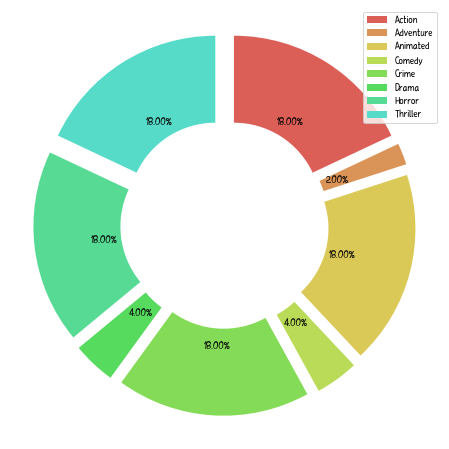

In [48]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df_movieGR.index)):
    explode.append(0.1)

pie = ax.pie(df_movieGR.cnt,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],df_movieGR.index) ## 범례 표시
#plt.show()
plt.savefig('./output/project/영화장르_파이.png')

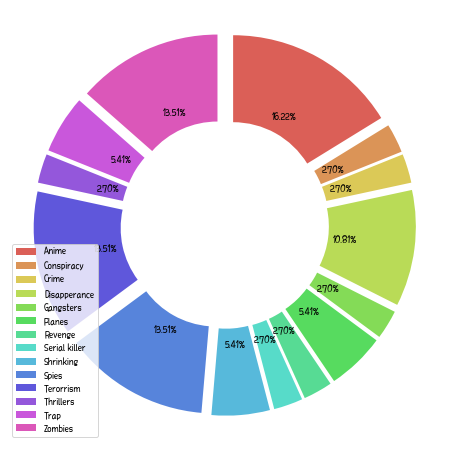

In [51]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df_movieDGR.index)):
    explode.append(0.1)

pie = ax.pie(df_movieDGR.cnt,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],df_movieDGR.index) ## 범례 표시
#plt.show()
plt.savefig('./output/project/영화세부장르_파이.png')

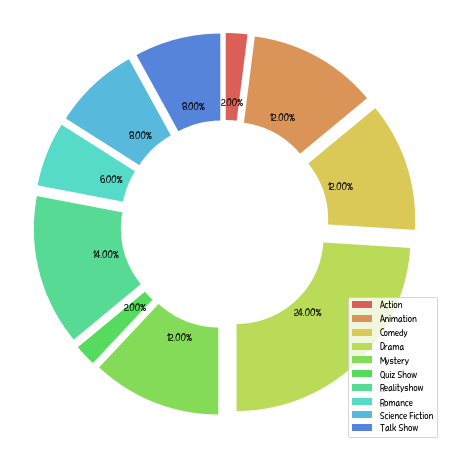

In [52]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df_tvshowGR.index)):
    explode.append(0.1)

pie = ax.pie(df_tvshowGR.cnt,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )



plt.legend(pie[0],df_tvshowGR.index) ## 범례 표시
#plt.show()
plt.savefig('./output/project/티비쇼장르_파이.png')

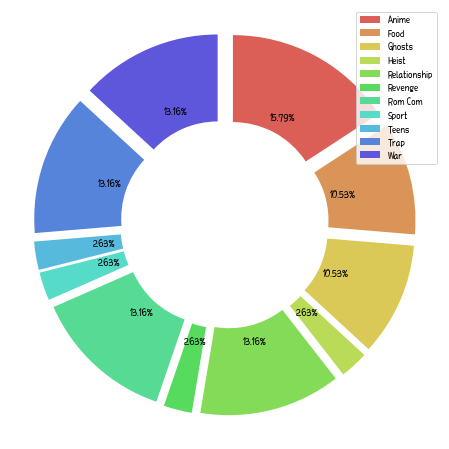

In [53]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df_tvshowDGR.index)):
    explode.append(0.1)

pie = ax.pie(df_tvshowDGR.cnt,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df_tvshowDGR.index) ## 범례 표시
#plt.show()
plt.savefig('./output/project/티비쇼세부장르_파이.png')

In [207]:
explode=[]
x=0.05
for i in range(len(df_tvshowDGR.index)):
    explode.append(0.05)

explode

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

In [226]:
df_tvshowDGR.cnt

AttributeError: 'DataFrame' object has no attribute 'cnt_sum'

In [347]:
df_tvshowDGR
percent=[]
for i in range(len(df_tvshowDGR.index)):
    percent.append((df_tvshowDGR.cnt[i]))

In [348]:
df_tvshowDGR=df_tvshowDGR.rename(columns={0:'cnt'})

In [349]:
cntsum=pd.DataFrame(df_tvshowDGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

cnt    38.0
Name: a, dtype: float64

In [350]:
(df_tvshowDGR.cnt[0]/cntsum.a)*100

cnt    15.789474
Name: a, dtype: float64

In [351]:
df_tvshowDGR
a=[]
for i in range(len(df_tvshowDGR.index)):
    a.append((df_tvshowDGR.cnt[i])/cntsum.a*100)


In [352]:
round(a[0],2)
a

[cnt    15.789474
 Name: a, dtype: float64,
 cnt    10.526316
 Name: a, dtype: float64,
 cnt    10.526316
 Name: a, dtype: float64,
 cnt    2.631579
 Name: a, dtype: float64,
 cnt    13.157895
 Name: a, dtype: float64,
 cnt    2.631579
 Name: a, dtype: float64,
 cnt    13.157895
 Name: a, dtype: float64,
 cnt    2.631579
 Name: a, dtype: float64,
 cnt    2.631579
 Name: a, dtype: float64,
 cnt    13.157895
 Name: a, dtype: float64,
 cnt    13.157895
 Name: a, dtype: float64]

In [353]:
percent=[]
for i in range(len(df_tvshowDGR.index)):
    percent.append(round(a[i],2))


In [354]:
percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent


In [355]:
percent=pd.DataFrame(percent)
percent.percent

0     15.79
1     10.53
2     10.53
3      2.63
4     13.16
5      2.63
6     13.16
7      2.63
8      2.63
9     13.16
10    13.16
Name: percent, dtype: float64

In [363]:
#lastmonth1=pd.concat([lastmonthMovieGR,lastmonthtvGR] , axis=1)

#pd.concat([df_tvshowDGR,percent.percent],axis=1)
df_tvshowDGR1=df_tvshowDGR.reset_index()
df_tvshowDGR1=pd.concat([df_tvshowDGR1,percent],axis=1)
df_tvshowDGR1
df_tvshowDGR1.set_index('index',inplace=True)



In [370]:
df_tvshowDGR1

,cnt,percent
index,,
Anime,6.0,15.79
Food,4.0,10.53
Ghosts,4.0,10.53
Heist,1.0,2.63
Relationship,5.0,13.16
Revenge,1.0,2.63
Rom Com,5.0,13.16
Sport,1.0,2.63
Teens,1.0,2.63


In [1]:
df_tvshowGR

NameError: name 'df_tvshowGR' is not defined

In [364]:
df_tvshowGR
percent=[]
for i in range(len(df_tvshowGR.index)):
    percent.append((df_tvshowGR.cnt[i]))

    
df_tvshowGR=df_tvshowGR.rename(columns={0:'cnt'})


cntsum=pd.DataFrame(df_tvshowGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df_tvshowGR.cnt[0]/cntsum.a)*100

df_tvshowGR
a=[]
for i in range(len(df_tvshowGR.index)):
    a.append((df_tvshowGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df_tvshowGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

df_tvshowGR1=df_tvshowGR.reset_index()
df_tvshowGR1=pd.concat([df_tvshowGR1,percent],axis=1)
df_tvshowGR1
df_tvshowGR1.set_index('index',inplace=True)

In [369]:
df_tvshowGR1

,cnt,percent
index,,
Action,1.0,2.0
Animation,6.0,12.0
Comedy,6.0,12.0
Drama,12.0,24.0
Mystery,6.0,12.0
Quiz Show,1.0,2.0
Realityshow,7.0,14.0
Romance,3.0,6.0
Science Fiction,4.0,8.0


In [367]:
df_movieDGR
percent=[]
for i in range(len(df_movieDGR.index)):
    percent.append((df_movieDGR.cnt[i]))

    
df_movieDGR=df_movieDGR.rename(columns={0:'cnt'})


cntsum=pd.DataFrame(df_movieDGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df_movieDGR.cnt[0]/cntsum.a)*100

df_movieDGR
a=[]
for i in range(len(df_movieDGR.index)):
    a.append((df_movieDGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df_movieDGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

df_movieDGR1=df_movieDGR.reset_index()
df_movieDGR1=pd.concat([df_movieDGR1,percent],axis=1)
df_movieDGR1
df_movieDGR1.set_index('index',inplace=True)

In [377]:
df_movieDGR1
df_movieDGR1.to_csv('output/project/영화세부장르_퍼센트.csv')

In [372]:
df_movieGR
percent=[]
for i in range(len(df_movieGR.index)):
    percent.append((df_movieGR.cnt[i]))

    
df_movieGR=df_movieGR.rename(columns={0:'cnt'})


cntsum=pd.DataFrame(df_movieGR.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df_movieGR.cnt[0]/cntsum.a)*100

df_movieGR
a=[]
for i in range(len(df_movieGR.index)):
    a.append((df_movieGR.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df_movieGR.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

df_movieGR1=df_movieGR.reset_index()
df_movieGR1=pd.concat([df_movieGR1,percent],axis=1)
df_movieGR1
df_movieGR1.set_index('index',inplace=True)

In [378]:
df_movieGR1.to_csv('output/project/영화장르_퍼센트.csv')

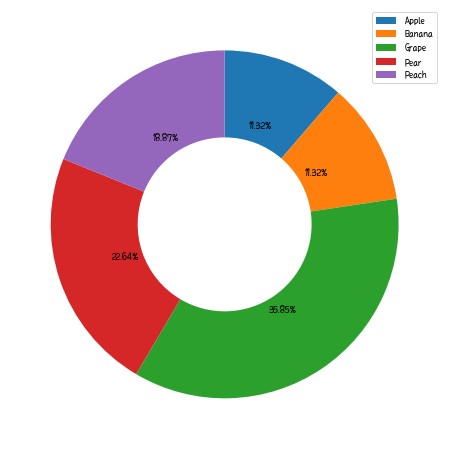

In [213]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = ['Apple','Banana','Grape','Pear','Peach'] ## 라벨
frequency = [120,120,380,240,200] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

In [104]:
import pandas as pd
import numpy as np
## 데이터 준비
df = pd.DataFrame()
df['득표수'] = [10,20,15,13,22,44,11,22,33,16,39,22]
df['지역'] = ['서울','서울','서울','경기','경기','경기','인천','인천','인천','인천','인천','제주']
df['연예인'] = ['강호동','유재석','이상민','이수근','하하','탁재훈','아이린','다현','한예슬','김사랑','강민경','수지']


,득표수,지역,연예인
0,10,서울,강호동
1,20,서울,유재석
2,15,서울,이상민
3,13,경기,이수근
4,22,경기,하하
5,44,경기,탁재훈
6,11,인천,아이린
7,22,인천,다현
8,33,인천,한예슬
9,16,인천,김사랑


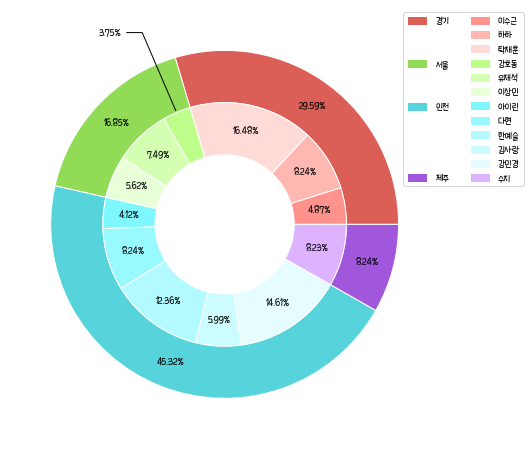

In [105]:





import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import seaborn as sns
 
freq_col = '득표수' ## 빈도수 칼럼
outer_col = '지역' ## 상위 그룹 칼럼
inner_col = '연예인' ## 하위 그룹 칼럼
 
size = 0.3 ## 바깥쪽, 안쪽 도넛 조각 조각의 반지름 비율을 0.3으로 한다.
threshold = 4 ## 상한선 백분율
 
color = sns.color_palette('hls',len(df[outer_col].unique())) ## 바깥쪽 도넛의 색상설정
 
summary = df.groupby(outer_col)[freq_col].sum().reset_index() ## 지역별로 득표수를 집계한다.
outer_data = summary[freq_col] ## 바깥쪽 도넛에 해당하는 데이터
inner_data = [] ## 안쪽 도넛에 대응하는 데이터
for s in summary[outer_col]:
    inner_data += list(df.query('{0}==@s'.format(outer_col))[freq_col])
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(outer_data,
             radius=1,
             colors=color,
             wedgeprops=dict(width=size,edgecolor='w'))
 
## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data) ## 바깥쪽 빈도수의 총합
 
sum_pct = 0 ## 백분율 초기값
 
for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2 ## 각1, 각2
    out_r = out_pie[0][i].r ## 원의 반지름
    
    x = ((2*out_r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*out_r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{outer_data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center')
 
outer_color = [] ## 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor()) ## 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color] ## rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0],x[1],1) for x in outer_color_hsv] ## 색상 채도만 가져오고 명도는 1로 고정한다.
 
inner_color = [] ## 안쪽 도넛 조각의 색상을 담는 리스트
for i, g in enumerate(summary[outer_col]):
    num_sub_group = len(df.query('{0}==@g'.format(outer_col))) ## 하위 그룹 개수
    jump = outer_color_hsv[i][1]/(num_sub_group+1) ## 채도 등분점 간격
    temp_list = []
    temp_s = np.arange(0,outer_color_hsv[i][1],jump) 
    temp_s = temp_s[1:] ## 채도 등분점
    for t in temp_s:
        h = outer_color_hsv[i][0] ## 색상
        s = t ## 채도
        v = outer_color_hsv[i][2] ## 명도
        temp_list.append((h,s,v))
    inner_color += temp_list[::-1] ## 순서를 바꿈
    
inner_color = [mcl.hsv_to_rgb(x) for x in inner_color] #3 hsv를 다시 rgb로 바꾼다.
 
## 안쪽 도넛 차트 출력
inner_pie = ax.pie(inner_data,
       radius=1-size,
       colors=inner_color,
       wedgeprops=dict(width=size,edgecolor='w'))
 
## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
inner_sum_pct = 0 ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2 ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r ## 안쪽 도넛의 반지름
    
    x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        text = f'{inner_data[i]/total*100:.2f}%' ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100-inner_sum_pct:.2f}%'
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = out_r*np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = out_r*np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=((out_r-size)*x, (out_r-size)*y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center')
 
## 범례
## 범례는 2줄로 만든다. 왼쪽 줄에는 상위 그룹을 표시하고 오른쪽 줄에는 하위 그룹을 표시한다.
inner_pie_index = -1 ## 안쪽 도넛 차트의 데이터에 접근할 인덱스 초기값
right_legend_patches = [] ## 오른쪽 범례 칼럼에 들어가는 요소
left_legend_patches = [] ## 왼쪽 범례 칼럼에 들어가는 요소
right_labels = [] ## 오른쪽 범례 칼럼에 들어가는 라벨
left_labels = [] ## 왼쪽 범례 칼러에 들어가는 라벨
for i in range(len(outer_data)):
    left_legend_patches.append(out_pie[0][i])
    
    outer_label = summary[outer_col][i] ## 바깥쪽 도넛 차트 라벨
 
    left_labels.append(outer_label)
    temp_data = df.query('{0}==@outer_label'.format(outer_col)) ## 바깥쪽 라벨에 대응하는 안쪽 도넛 데이터
    temp_data = temp_data.reset_index(drop=True)
    
    temp_number = len(temp_data)-1
    
    ## 오른쪽 범례 개수와 맞추기 위해 빈 범례를 만듬
    for k in range(temp_number):
        rect = mpt.Rectangle((0,0),1,1.1,facecolor='None')
        left_legend_patches.append(rect)
        left_labels.append('')
    
    ## 오른쪽 범례 칼럼을 만든다.
    for j in range(len(temp_data)):
        inner_pie_index += 1
        
        right_legend_patches.append(inner_pie[0][inner_pie_index])
        right_labels.append(temp_data[inner_col][j])
        
    ## 범례 요소와 라벨을 합친다.
    legend_patches = left_legend_patches+right_legend_patches
    labels = left_labels + right_labels
        
## 범례 출력
plt.legend(legend_patches,
           labels,
           ncol=2,
           loc='upper right',
           handleheight=1, ## 범례 줄 맞춤
           labelspacing=0.5, ## 범례 줄 간격
           bbox_to_anchor=(1.2,1))
 
plt.show()